# Let user label the charges data for automated batch processing

In [1]:
import bubble as bubl

import os
from ipywidgets import interact
import ipywidgets as widgets

%matplotlib notebook
from matplotlib import pyplot as plt

In [2]:
# Parameters
file_out = "labels.cvs"
video_dir = "./data/"

In [3]:
# Get a list with all videos
vid_list = [video_dir + el for el in os.listdir(video_dir) if el[-4:] == ".mp4"]

<IPython.core.display.Javascript object>


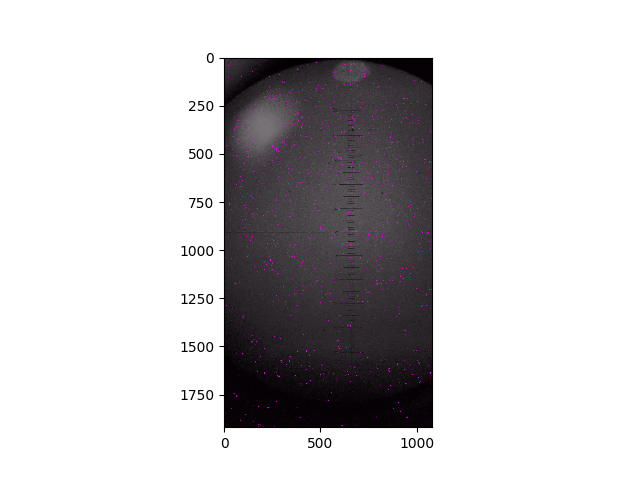

interactive(children=(IntSlider(value=60, description='threshold', step=5), Dropdown(description='video', opti…

In [18]:
# Parameters to set 
max_th = [0.6 for _ in vid_list]
center = [(0,0) for _ in vid_list]
lower = [(0,0) for _ in vid_list]
duration = [0.0 for _ in vid_list]

tr = bubl.Tracker(sample_only=True)
tr.params.minArea = 1
for vid in vid_list:
    tr.load_video(vid, append_ok=True)

ctrl = False
pos = 0
curr = 0

fig, ax = plt.subplots()

def onpress(event):
    global ctrl
    if event.key == 'control':
        ctrl = True
def onrelease(event):
    global ctrl
    if event.key == 'control':
        ctrl = False
def onbutton(event):
    global center
    global lower
    global pos
    if ctrl and pos < 2:
        ax.plot([event.xdata], [event.ydata], "x")
        fig.canvas.draw()
        if pos == 0:
            center[curr] = (event.xdata, event.ydata)
        elif pos == 1:
            lower[curr] = (event.xdata, event.ydata)
        pos += 1

def update_th(threshold, video, time):
    global curr
    global pos
    threshold = threshold / 100.0
    max_th[curr] = threshold
    tr.params.maxThreshold = 255 * threshold
    
    pts, img = tr.test_keypoints(curr)
    
    ax.imshow(img)
    print("Points:", len(pts))
    #print("Threshold, vid_idx:", threshold, curr)
    
    fig.canvas.mpl_connect('key_press_event', onpress)
    fig.canvas.mpl_connect('key_release_event', onrelease)
    fig.canvas.mpl_connect('button_press_event', onbutton)
    
    plt.show()
    
    duration[curr] = float(time)
    
    if curr != vid_list.index(video):
        next(video)
    
def next(video):
    global curr
    global pos
    ax.clear()
    curr = vid_list.index(video)
    update_th(max_th[curr]*100, video, duration[curr])
    pos = 0

interact(update_th, threshold=widgets.IntSlider(min=0,max=100,step=5,value=60), video=vid_list, time=20.0)
pass

In [16]:
# Print all results for double checking
print(vid_list)
print(max_th)
print(center)
print(lower)
print(duration)

['./data/vid-09.mp4', './data/vid-12.mp4']
[0.6, 0.6]
[(494.85714285714266, 654.4188311688308), (619.5324675324673, 737.535714285714)]
[(489.66233766233745, 1059.613636363636), (297.45454545454527, 1288.1850649350647)]
[20.0, 20.0]


In [65]:
# Save results to file
with open(file_out, "w") as file:
    file.write("name max_th center_x center_y lower_x lower_y duration\n")
    for i, _ in enumerate(vid_list):
        file.write("{} {:.2f} {} {} {} {} {}\n".format(
            vid_list[i],
            max_th[i],
            center[i][0],
            center[i][1],
            lower[i][0],
            lower[i][1],
            duration[i]
        ))